In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn 

import tensorflow as tf
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import load_model

In [2]:
train_data_path = "/content/drive/train_data.xlsx"
test_data_path = "/content/drive/test_data.xlsx"

In [3]:
train_data = pd.read_excel(train_data_path, index_col='Unnamed: 0')
train_df = train_data.copy()
train_df.head()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col35,col36,col37,col38,col39,col40,col41,col42,col43,col44
0,274,250,206,231,153,178,133,119,140,71,...,293,110,283,68,278,110,280,134,Right,A
1,207,305,182,261,159,213,139,177,121,153,...,200,206,184,190,176,224,176,239,Right,A
2,163,354,121,330,91,294,86,251,97,223,...,193,256,188,233,181,264,181,273,Right,A
3,165,355,125,334,93,298,87,259,96,229,...,191,262,190,240,185,267,183,275,Right,A
4,169,350,130,333,98,297,91,257,100,229,...,193,260,194,241,190,268,186,276,Right,A


In [4]:
def preprocess_data(df):
  le = preprocessing.LabelEncoder()
  min_max_scaler = preprocessing.MinMaxScaler()

  labels = le.fit_transform(df['col44'])
  df['col43'] = le.fit_transform(df['col43'])

  df = min_max_scaler.fit_transform(df.drop('col44', axis=1))
  df = pd.DataFrame(df, columns=[f'col{c}' for c in range(1, 44)])
  df['col44'] = labels
  df[['col43', 'col44']] = df[['col43', 'col44']].astype('int')
  
  return df

In [5]:
df = preprocess_data(train_df)
df.head()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col35,col36,col37,col38,col39,col40,col41,col42,col43,col44
0,0.781818,0.243902,0.621053,0.367589,0.423729,0.328671,0.313589,0.183007,0.271605,0.077399,...,0.715909,0.058608,0.666667,0.074194,0.627376,0.258359,0.621053,0.349112,1,0
1,0.578788,0.512195,0.536842,0.486166,0.449153,0.451049,0.334495,0.372549,0.212963,0.331269,...,0.363636,0.410256,0.282946,0.467742,0.239544,0.604863,0.256140,0.659763,1,0
2,0.445455,0.751220,0.322807,0.758893,0.161017,0.734266,0.149826,0.614379,0.138889,0.547988,...,0.337121,0.593407,0.298450,0.606452,0.258555,0.726444,0.273684,0.760355,1,0
3,0.451515,0.756098,0.336842,0.774704,0.169492,0.748252,0.153310,0.640523,0.135802,0.566563,...,0.329545,0.615385,0.306202,0.629032,0.273764,0.735562,0.280702,0.766272,1,0
4,0.463636,0.731707,0.354386,0.770751,0.190678,0.744755,0.167247,0.633987,0.148148,0.566563,...,0.337121,0.608059,0.321705,0.632258,0.292776,0.738602,0.291228,0.769231,1,0


In [6]:
def data_split(df, num_of_class):
  X = df.drop('col44', axis=1)
  y = df['col44']
  X_train, X_test, y_train, y_test = train_test_split(X,
                                                      y,
                                                      test_size=0.20,
                                                      random_state=42)
  y_train = to_categorical(y_train, num_of_class)
  y_test = to_categorical(y_test, num_of_class)
  return X_train, X_test, y_train, y_test

In [7]:
num_of_class = df['col44'].nunique()
print(num_of_class)

7


In [8]:
X_train, X_val, y_train, y_val = data_split(df, num_of_class)

# TensorFlow Classsification Model

In [9]:
print(tf.__version__)

2.12.0


In [10]:
#y_train = to_categorical(y_train, num_of_class)
#y_val = to_categorical(y_val, num_of_class)

In [11]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(16, 'relu'),
    tf.keras.layers.Dense(32, 'relu'),
    tf.keras.layers.Dense(num_of_class, 'softmax')
])

model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [12]:
history = model.fit(X_train,
                    y_train,
                    epochs=50, 
                    validation_data=(X_val, y_val))

Epoch 1/50
164/164 [==============================] - 3s 7ms/step - loss: 1.6312 - accuracy: 0.4416 - val_loss: 1.0842 - val_accuracy: 0.7096
Epoch 2/50
164/164 [==============================] - 1s 5ms/step - loss: 0.6905 - accuracy: 0.8598 - val_loss: 0.4192 - val_accuracy: 0.9421
Epoch 3/50
164/164 [==============================] - 1s 5ms/step - loss: 0.2458 - accuracy: 0.9743 - val_loss: 0.1318 - val_accuracy: 0.9817
Epoch 4/50
164/164 [==============================] - 1s 5ms/step - loss: 0.0822 - accuracy: 0.9939 - val_loss: 0.0444 - val_accuracy: 0.9992
Epoch 5/50
164/164 [==============================] - 1s 5ms/step - loss: 0.0387 - accuracy: 0.9975 - val_loss: 0.0234 - val_accuracy: 0.9992
Epoch 6/50
164/164 [==============================] - 1s 4ms/step - loss: 0.0227 - accuracy: 0.9977 - val_loss: 0.0156 - val_accuracy: 0.9992
Epoch 7/50
164/164 [==============================] - 1s 4ms/step - loss: 0.0157 - accuracy: 0.9981 - val_loss: 0.0088 - val_accuracy: 1.0000
Epoch 

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 352       
                                                                 
 dense_1 (Dense)             (None, 16)                144       
                                                                 
 dense_2 (Dense)             (None, 32)                544       
                                                                 
 dense_3 (Dense)             (None, 7)                 231       
                                                                 
Total params: 1,271
Trainable params: 1,271
Non-trainable params: 0
_________________________________________________________________


In [20]:
np.argmax(model.predict(np.expand_dims(np.array(X_val.iloc[2]), axis=0)))

1/1 [==============================] - 0s 22ms/step


4

In [23]:
y_val[2]

array([0., 0., 0., 0., 1., 0., 0.], dtype=float32)

# Evaluating the Model

In [16]:
test_data = pd.read_excel(test_data_path, index_col='Unnamed: 0')
test_df = train_data.copy()
test_df.head()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col35,col36,col37,col38,col39,col40,col41,col42,col43,col44
0,274,250,206,231,153,178,133,119,140,71,...,293,110,283,68,278,110,280,134,Right,A
1,207,305,182,261,159,213,139,177,121,153,...,200,206,184,190,176,224,176,239,Right,A
2,163,354,121,330,91,294,86,251,97,223,...,193,256,188,233,181,264,181,273,Right,A
3,165,355,125,334,93,298,87,259,96,229,...,191,262,190,240,185,267,183,275,Right,A
4,169,350,130,333,98,297,91,257,100,229,...,193,260,194,241,190,268,186,276,Right,A


In [17]:
test_df = preprocess_data(test_df) 
test_df.head()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col35,col36,col37,col38,col39,col40,col41,col42,col43,col44
0,0.781818,0.243902,0.621053,0.367589,0.423729,0.328671,0.313589,0.183007,0.271605,0.077399,...,0.715909,0.058608,0.666667,0.074194,0.627376,0.258359,0.621053,0.349112,1,0
1,0.578788,0.512195,0.536842,0.486166,0.449153,0.451049,0.334495,0.372549,0.212963,0.331269,...,0.363636,0.410256,0.282946,0.467742,0.239544,0.604863,0.256140,0.659763,1,0
2,0.445455,0.751220,0.322807,0.758893,0.161017,0.734266,0.149826,0.614379,0.138889,0.547988,...,0.337121,0.593407,0.298450,0.606452,0.258555,0.726444,0.273684,0.760355,1,0
3,0.451515,0.756098,0.336842,0.774704,0.169492,0.748252,0.153310,0.640523,0.135802,0.566563,...,0.329545,0.615385,0.306202,0.629032,0.273764,0.735562,0.280702,0.766272,1,0
4,0.463636,0.731707,0.354386,0.770751,0.190678,0.744755,0.167247,0.633987,0.148148,0.566563,...,0.337121,0.608059,0.321705,0.632258,0.292776,0.738602,0.291228,0.769231,1,0


In [94]:
X_test = test_df.drop('col44', axis=1)
y_test = test_df['col44']
y_test = to_categorical(y_test, num_of_class)

In [100]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")

205/205 [==============================] - 0s 2ms/step - loss: 2.5379e-04 - accuracy: 1.0000
Model loss on test set: 0.0002537943364586681
Model accuracy on test set: 100.00%


In [97]:
def plot_curves(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    
    epochs = range(len(history.history['loss']))
    
    # Plot loss
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()
    
    # Plot Accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label='Training Accuracy')
    plt.plot(epochs, val_accuracy, label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend()

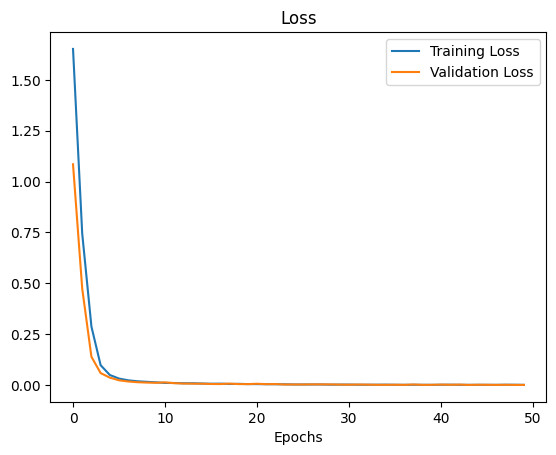

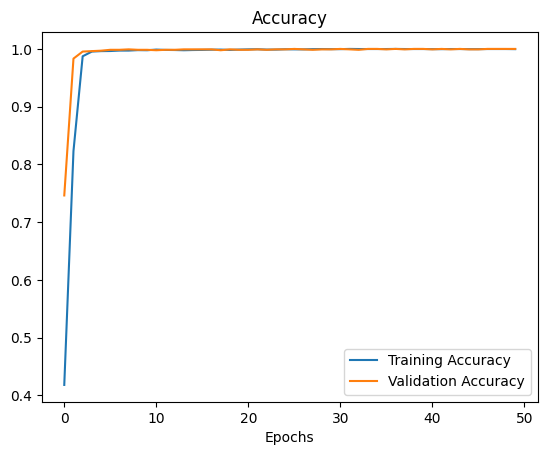

In [98]:
plot_curves(history)

In [103]:
from sklearn.metrics import confusion_matrix

y_preds = model.predict(X_test)
y_preds = np.argmax(y_preds, axis=1)
y_test = np.argmax(y_test, axis=1)
confusion_matrix(y_test, y_preds)

205/205 [==============================] - 0s 1ms/step


array([[1000,    0,    0,    0,    0,    0,    0],
       [   0, 1000,    0,    0,    0,    0,    0],
       [   0,    0, 1000,    0,    0,    0,    0],
       [   0,    0,    0, 1000,    0,    0,    0],
       [   0,    0,    0,    0, 1000,    0,    0],
       [   0,    0,    0,    0,    0, 1000,    0],
       [   0,    0,    0,    0,    0,    0,  556]])

# Save the Model


In [105]:
model.save('mp_landmark_model.h5')

In [ ]:
saved_model = load_model('mp_landmark_model.h5')
saved_model.summary()